In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('..\\code')

from population_models import init_asteroids_jpl, init_asteroids_granvik, init_asteroids_neopop

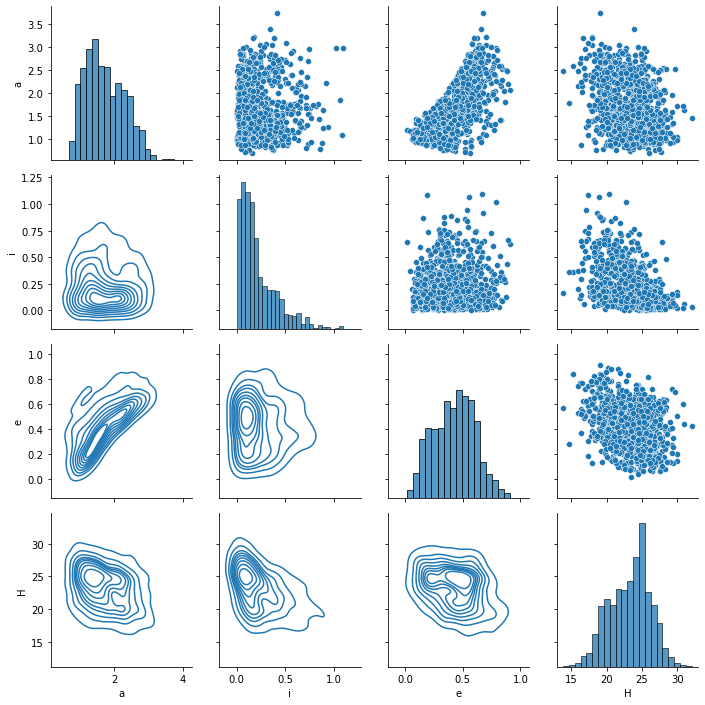

In [2]:
# JPL
df_asteroids = init_asteroids_jpl(1000)
jpl_fig = sns.PairGrid(data=df_asteroids, vars=['a', 'i', 'e', 'H'])
jpl_fig.map_diag(sns.histplot)
jpl_fig.map_upper(sns.scatterplot)
jpl_fig.map_lower(sns.kdeplot)

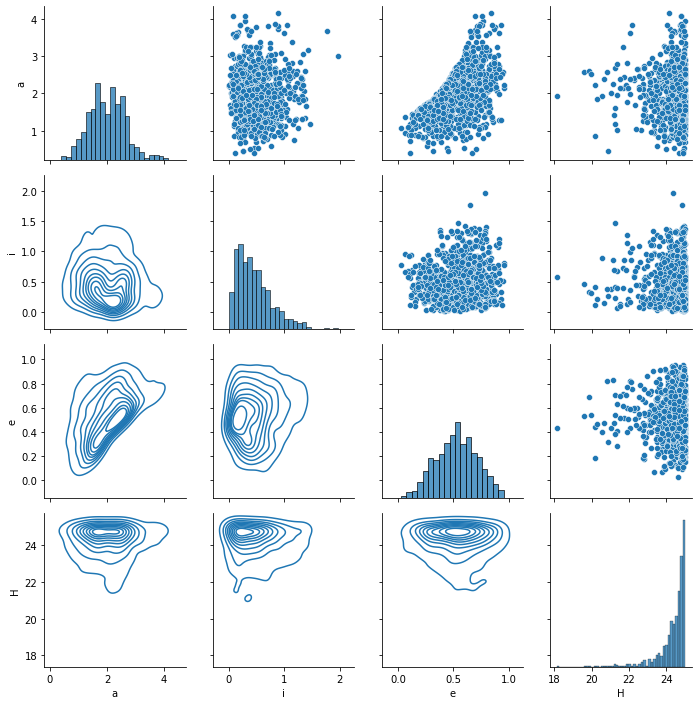

In [3]:
# NEOWISE, not stratified
df_asteroids = init_asteroids_granvik(1000, False)
nns_fig = sns.PairGrid(data=df_asteroids, vars=['a', 'i', 'e', 'H'])
nns_fig.map_diag(sns.histplot)
nns_fig.map_upper(sns.scatterplot)
nns_fig.map_lower(sns.kdeplot)

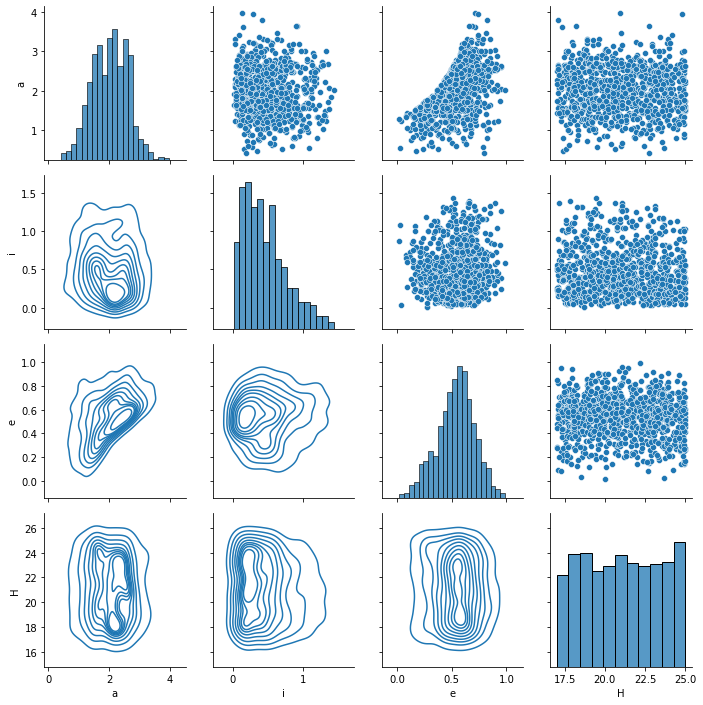

In [4]:
# NEOWISE, stratified
df_asteroids = init_asteroids_granvik(1000, True)
nsf_fig = sns.PairGrid(data=df_asteroids, vars=['a', 'i', 'e', 'H'])
nsf_fig.map_diag(sns.histplot)
nsf_fig.map_upper(sns.scatterplot)
nsf_fig.map_lower(sns.kdeplot)

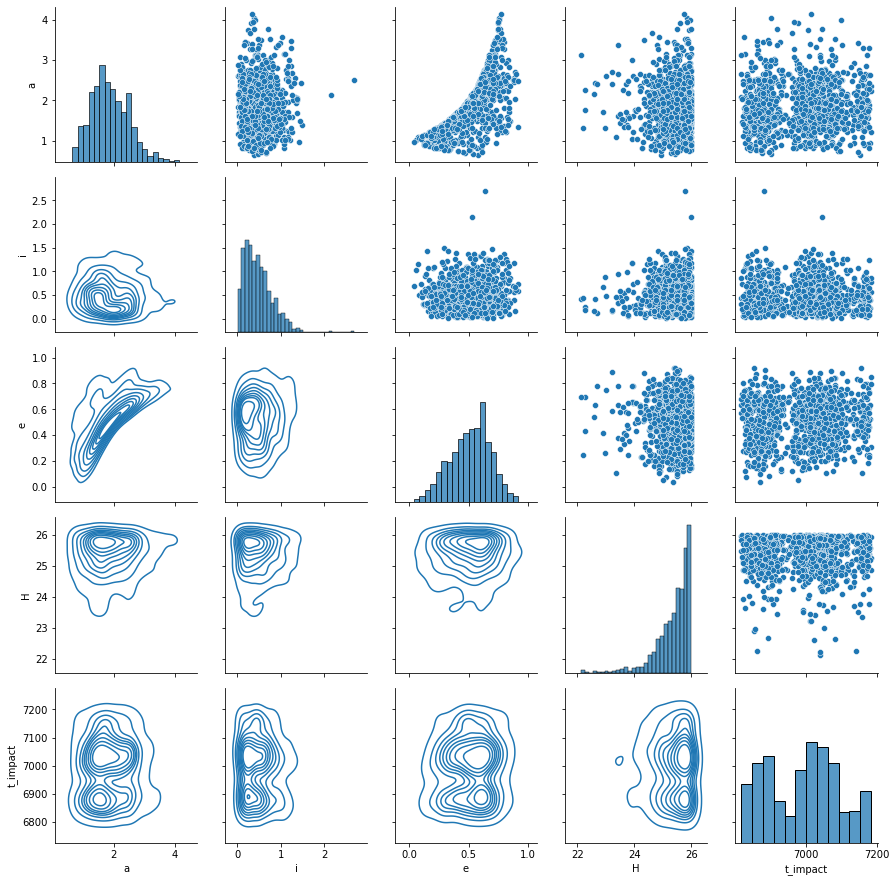

In [5]:
# NEOPOP, with impactors
df_asteroids = init_asteroids_neopop(1000)
neo_fig = sns.PairGrid(data=df_asteroids, vars=['a', 'i', 'e', 'H', 't_impact'])
neo_fig.map_diag(sns.histplot)
neo_fig.map_upper(sns.scatterplot)
neo_fig.map_lower(sns.kdeplot)

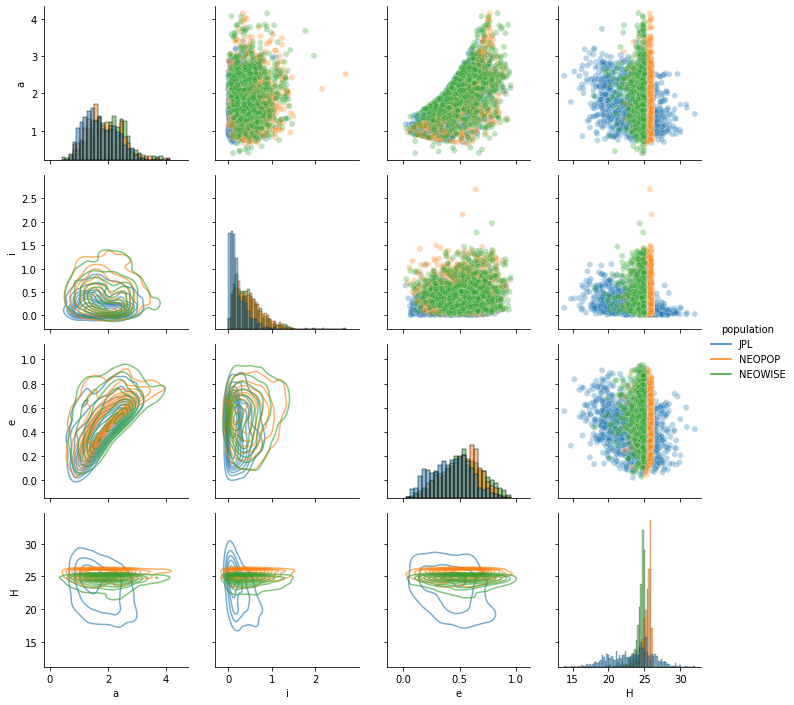

In [12]:
df_asteroids_jpl = init_asteroids_jpl(1000)[['a','e','i','H']]
df_asteroids_neowise = init_asteroids_granvik(1000, False)[['a','e','i','H']]
df_asteroids_neopop = init_asteroids_neopop(1000)[['a','e','i','H']]
df_asteroids_jpl['population'] = 'JPL'
df_asteroids_neowise['population'] = 'NEOWISE'
df_asteroids_neopop['population'] = 'NEOPOP'
df_asteroids = df_asteroids_jpl.append(df_asteroids_neopop, ignore_index=True).append(df_asteroids_neowise, ignore_index=True)
comb_fig = sns.PairGrid(data=df_asteroids, vars=['a', 'i', 'e', 'H'], hue='population')
comb_fig.map_diag(sns.histplot)
comb_fig.map_upper(sns.scatterplot, alpha=0.3)
comb_fig.map_lower(sns.kdeplot, alpha=0.6)
comb_fig.add_legend()